![](data/venn_ml.png)

![](data/types.png)

![](data/regresion.jpg)

![](data/linear.png)

![](data/unsu.png)

![](data/rein.png)

![](data/ext_sklearn.jpeg)

![](data/sklearn.png)

# WorkFlow

+ Obtener datos
+ Definir objetivo
+ Limpieza de datos (unidades, outliers, one-hot, etc..)
+ Definir modelo (regresión, clasificación, ...)
+ Entrenar (hiperparámetros, validación, ...) (**)
+ Predecir (testear)
+ Evaluar
+ Si hay mucho error volver a (**)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
equipos = ["Texas","Boston","Detroit","Kansas","St.","New_S.","New_Y.",
           "Milwaukee","Colorado","Houston","Baltimore","Los_An.","Chicago",
           "Cincinnati","Los_P.","Philadelphia","Chicago","Cleveland","Arizona",
           "Toronto","Minnesota","Florida","Pittsburgh","Oakland","Tampa",
           "Atlanta","Washington","San.F","San.I","Seattle"]
bateos = [5659,  5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598,
          5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559,
          5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]

runs = [855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654, 735,
        667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570,
        593, 556]

datos = pd.DataFrame({'equipos': equipos, 'bateos': bateos, 'runs': runs})
datos.head(3)

,equipos,bateos,runs
0,Texas,5659,855
1,Boston,5710,875
2,Detroit,5563,787


Text(0.5, 1.0, 'bateos y runs')

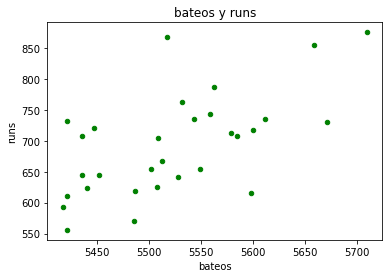

In [5]:
fig, ax = plt.subplots(figsize = (6,4))

datos.plot(x = 'bateos', y = 'runs', c = 'green', kind = 'scatter', ax = ax)

ax.set_title('bateos y runs')

In [6]:
corr_test = pearsonr(x = datos['bateos'], y = datos['runs'])
print(f"El coeficiente de correlacion de pearson es de: {corr_test}")

El coeficiente de correlacion de pearson es de: (0.6106270467206688, 0.0003388351359791963)


In [7]:
help(pearsonr)

Help on function pearsonr in module scipy.stats.stats:

pearsonr(x, y)
    Pearson correlation coefficient and p-value for testing non-correlation.
    
    The Pearson correlation coefficient [1]_ measures the linear relationship
    between two datasets.  The calculation of the p-value relies on the
    assumption that each dataset is normally distributed.  (See Kowalski [3]_
    for a discussion of the effects of non-normality of the input on the
    distribution of the correlation coefficient.)  Like other correlation
    coefficients, this one varies between -1 and +1 with 0 implying no
    correlation. Correlations of -1 or +1 imply an exact linear relationship.
    Positive correlations imply that as x increases, so does y. Negative
    correlations imply that as x increases, y decreases.
    
    The p-value roughly indicates the probability of an uncorrelated system
    producing datasets that have a Pearson correlation at least as extreme
    as the one computed from these da

In [8]:
X = datos[['bateos']]
Y = datos[['runs']]

In [12]:
X.values.reshape(-1,1)

array([[5659],
       [5710],
       [5563],
       [5672],
       [5532],
       [5600],
       [5518],
       [5447],
       [5544],
       [5598],
       [5585],
       [5436],
       [5549],
       [5612],
       [5513],
       [5579],
       [5502],
       [5509],
       [5421],
       [5559],
       [5487],
       [5508],
       [5421],
       [5452],
       [5436],
       [5528],
       [5441],
       [5486],
       [5417],
       [5421]], dtype=int64)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X.values, Y.values,
                                                   train_size = 0.8,
                                                   random_state = 1234,
                                                   shuffle = True)

In [15]:
X_train

array([[5672],
       [5452],
       [5513],
       [5612],
       [5421],
       [5436],
       [5659],
       [5563],
       [5486],
       [5441],
       [5421],
       [5600],
       [5502],
       [5528],
       [5436],
       [5598],
       [5509],
       [5421],
       [5487],
       [5549],
       [5508],
       [5518],
       [5559],
       [5579]], dtype=int64)

In [14]:
modelo = LinearRegression()

In [16]:
modelo.fit(X = X_train, y = y_train) #entrenamiento

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
modelo.coef_ # a la proporcion en que esta multiplicandose la/las variable(s) 

array([[0.55287135]])

In [21]:
modelo.score(X_test, y_test) 
#R^2 es el score que nos dira en que 'porcentaje' se explica mi variable dependiente con las independientes

0.4894282764285326

In [22]:
modelo.intercept_

array([-2367.7028413])

In [23]:
pred = modelo.predict([[5423]])

In [24]:
pred

array([[630.51850845]])

In [26]:
predicciones = modelo.predict(X = X_test)

In [27]:
predicciones #Predcciones

array([[643.78742093],
       [720.0836677 ],
       [690.78148597],
       [789.19258689],
       [627.20128033],
       [697.41594221]])

In [29]:
y_test #verdad de mi variable dependiente

array([[721],
       [708],
       [762],
       [875],
       [593],
       [735]], dtype=int64)

In [30]:
mean_squared_error(y_test, predicciones)

3520.8458755573306

In [31]:
X_train = sm.add_constant(X_train, prepend = True)
modelo = sm.OLS(endog = y_train, exog = X_train)

In [34]:
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     8.191
Date:                Mon, 15 Feb 2021   Prob (F-statistic):            0.00906
Time:                        11:09:23   Log-Likelihood:                -134.71
No. Observations:                  24   AIC:                             273.4
Df Residuals:                      22   BIC:                             275.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2367.7028   1066.357     -2.220      0.0

In [35]:
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha = 0.05)
predicciones.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,768.183475,32.658268,700.454374,835.912577,609.456054,926.910897
1,646.551778,19.237651,606.655332,686.448224,497.558860,795.544695
2,680.276930,14.186441,650.856053,709.697807,533.741095,826.812765
3,735.011194,22.767596,687.794091,782.228298,583.893300,886.129088
4,629.412766,23.713237,580.234522,678.591009,477.670673,781.154858


In [38]:
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

predicciones

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,x,y
4,629.412766,23.713237,580.234522,678.591009,477.670673,781.154858,5421.0,610
17,629.412766,23.713237,580.234522,678.591009,477.670673,781.154858,5421.0,556
10,629.412766,23.713237,580.234522,678.591009,477.670673,781.154858,5421.0,731
5,637.705836,21.455690,593.209459,682.202213,487.415815,787.995858,5436.0,707
14,637.705836,21.455690,593.209459,682.202213,487.415815,787.995858,5436.0,644
9,640.470193,20.738565,597.461042,683.479344,490.613761,790.326624,5441.0,624
1,646.551778,19.237651,606.655332,686.448224,497.558860,795.544695,5452.0,645
8,665.349404,15.547549,633.105760,697.593047,518.220836,812.477972,5486.0,570
18,665.902275,15.467938,633.823736,697.980814,518.809802,812.994748,5487.0,619
12,674.195345,14.531876,644.058079,704.332612,527.513997,820.876693,5502.0,654


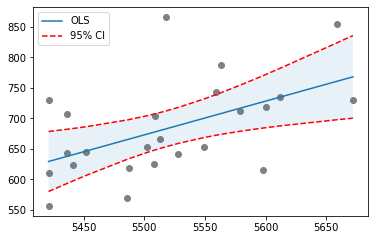

In [39]:
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

In [40]:
multi = pd.read_csv('data/multi.csv')
multi.head()

,Unnamed: 0,tv,radio,periodico,ventas
0,0,230.1,37.8,69.2,22.1
1,1,44.5,39.3,45.1,10.4
2,2,17.2,45.9,69.3,9.3
3,3,151.5,41.3,58.5,18.5
4,4,180.8,10.8,58.4,12.9


In [42]:
multi.drop('Unnamed: 0', inplace = True, axis = 1)

In [43]:
multi

,tv,radio,periodico,ventas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [44]:
multi.corr()

,tv,radio,periodico,ventas
tv,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
periodico,0.056648,0.354104,1.000000,0.228299
ventas,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

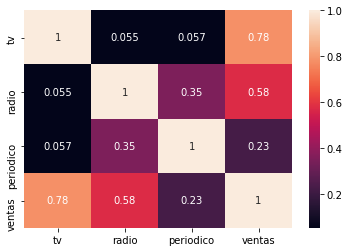

In [45]:
sns.heatmap(multi.corr(), annot  = True)

In [49]:
X = multi[['tv', 'radio', 'periodico']]
Y = multi[['ventas']]

In [53]:
X_train, x_test, y_train, y_test = train_test_split(X,Y,
                                                   train_size = 0.8,
                                                   shuffle = True)

In [54]:
X_train = sm.add_constant(X_train, prepend = True)
modelo = sm.OLS(endog= y_train,exog=X_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 ventas   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     463.1
Date:                Mon, 15 Feb 2021   Prob (F-statistic):           2.00e-77
Time:                        11:28:07   Log-Likelihood:                -310.55
No. Observations:                 160   AIC:                             629.1
Df Residuals:                     156   BIC:                             641.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8014      0.347      8.076      0.0

In [ ]:
# y  = 2.80(c)+0.0457(tv)+0.1901(radio)+0.0017(periodico)

In [63]:
X_train, x_test, y_train, y_test = train_test_split(X,Y,
                                                   train_size = 0.8,
                                                   shuffle = True)

In [64]:
modelo = sm.OLS(endog= y_train,exog=X_train)
modelo = modelo.fit()
print(modelo.summary())

                                 OLS Regression Results                                
Dep. Variable:                 ventas   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              3359.
Date:                Mon, 15 Feb 2021   Prob (F-statistic):                   3.90e-142
Time:                        11:41:37   Log-Likelihood:                         -328.52
No. Observations:                 160   AIC:                                      663.0
Df Residuals:                     157   BIC:                                      672.3
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [65]:
multi

,tv,radio,periodico,ventas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [66]:
modelo.predict([[220,65,25]])

array([26.87876348])

In [67]:
modelo.predict([[170,12,8]])

array([12.0500307])

In [57]:
modelo = LinearRegression()
modelo.fit(X = X_train, y = y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
modelo.score(x_test,y_test)

0.8912518054235252

In [60]:
modelo.coef_

array([[ 4.50598389e-02,  1.88398651e-01, -1.67529472e-05]])

In [62]:
modelo.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [68]:
census =  pd.read_csv('data/census.csv')
census

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,72145,Puerto Rico,Vega Baja,56858,27379,29479,96.4,3.4,0.1,0.0,...,1.2,1.3,0.3,32.0,13660,78.3,17.6,4.1,0.0,15.2
3216,72147,Puerto Rico,Vieques,9130,4585,4545,96.7,2.9,0.0,0.0,...,10.8,0.0,1.4,14.0,2860,44.5,41.6,13.6,0.3,12.2
3217,72149,Puerto Rico,Villalba,24685,12086,12599,99.7,0.0,0.0,0.0,...,3.2,0.0,3.3,26.9,6795,59.2,27.5,13.1,0.2,25.9
3218,72151,Puerto Rico,Yabucoa,36279,17648,18631,99.8,0.2,0.0,0.0,...,2.3,2.3,1.5,29.5,8083,65.1,27.6,7.3,0.0,24.3


In [70]:
census.dtypes

CensusId             int64
State               object
County              object
TotalPop             int64
Men                  int64
Women                int64
Hispanic           float64
White              float64
Black              float64
Native             float64
Asian              float64
Pacific            float64
Citizen              int64
Income             float64
IncomeErr          float64
IncomePerCap         int64
IncomePerCapErr      int64
Poverty            float64
ChildPoverty       float64
Professional       float64
Service            float64
Office             float64
Construction       float64
Production         float64
Drive              float64
Carpool            float64
Transit            float64
Walk               float64
OtherTransp        float64
WorkAtHome         float64
MeanCommute        float64
Employed             int64
PrivateWork        float64
PublicWork         float64
SelfEmployed       float64
FamilyWork         float64
Unemployment       float64
d

In [71]:
census.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 37 columns):
CensusId           3220 non-null int64
State              3220 non-null object
County             3220 non-null object
TotalPop           3220 non-null int64
Men                3220 non-null int64
Women              3220 non-null int64
Hispanic           3220 non-null float64
White              3220 non-null float64
Black              3220 non-null float64
Native             3220 non-null float64
Asian              3220 non-null float64
Pacific            3220 non-null float64
Citizen            3220 non-null int64
Income             3219 non-null float64
IncomeErr          3219 non-null float64
IncomePerCap       3220 non-null int64
IncomePerCapErr    3220 non-null int64
Poverty            3220 non-null float64
ChildPoverty       3219 non-null float64
Professional       3220 non-null float64
Service            3220 non-null float64
Office             3220 non-null float64
Constru

In [72]:
census['Poverty']

0       12.9
1       13.4
2       26.7
3       16.8
4       16.7
        ... 
3215    48.5
3216    39.1
3217    54.0
3218    52.3
3219    51.7
Name: Poverty, Length: 3220, dtype: float64

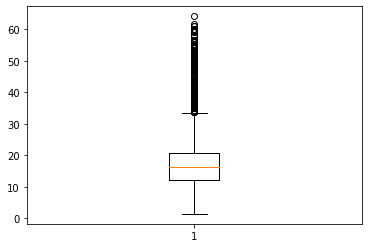

In [74]:
plt.boxplot(census['Poverty']);

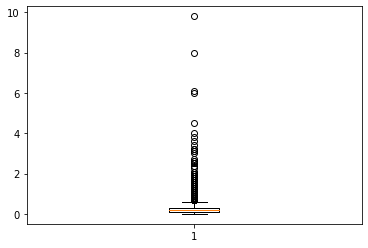

In [76]:
plt.boxplot(census['FamilyWork']);

In [77]:
import numpy as np

In [78]:
q_25 = np.quantile(census['FamilyWork'],0.25)
q_75 = np.quantile(census['FamilyWork'],0.75)

In [79]:
iqr = q_75-q_25

sup = q_75+(iqr*1.5)
low = q_25-(iqr*1.5)

In [80]:
df_clean = census[(census['FamilyWork'] > low)& (census['FamilyWork']< sup)]


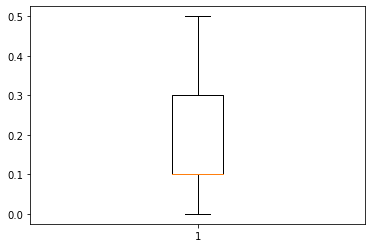

In [83]:
plt.boxplot(df_clean['FamilyWork']);

In [82]:
df_clean

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,72145,Puerto Rico,Vega Baja,56858,27379,29479,96.4,3.4,0.1,0.0,...,1.2,1.3,0.3,32.0,13660,78.3,17.6,4.1,0.0,15.2
3216,72147,Puerto Rico,Vieques,9130,4585,4545,96.7,2.9,0.0,0.0,...,10.8,0.0,1.4,14.0,2860,44.5,41.6,13.6,0.3,12.2
3217,72149,Puerto Rico,Villalba,24685,12086,12599,99.7,0.0,0.0,0.0,...,3.2,0.0,3.3,26.9,6795,59.2,27.5,13.1,0.2,25.9
3218,72151,Puerto Rico,Yabucoa,36279,17648,18631,99.8,0.2,0.0,0.0,...,2.3,2.3,1.5,29.5,8083,65.1,27.6,7.3,0.0,24.3


In [85]:
census['Hispanic']

0        2.6
1        4.5
2        4.6
3        2.2
4        8.6
        ... 
3215    96.4
3216    96.7
3217    99.7
3218    99.8
3219    99.5
Name: Hispanic, Length: 3220, dtype: float64

In [86]:
census['HispanicRate'] = census['Hispanic'] / 100

In [87]:
census['HispanicRate']

0       0.026
1       0.045
2       0.046
3       0.022
4       0.086
        ...  
3215    0.964
3216    0.967
3217    0.997
3218    0.998
3219    0.995
Name: HispanicRate, Length: 3220, dtype: float64

In [88]:
def to_percent(x):
    return (x/100)

In [89]:
conversion_list = ['White','Black','Native','Asian']

In [90]:
new_columns_list = [x+'Rate' for x in conversion_list]

census[new_columns_list] = census[conversion_list].apply(to_percent)

In [91]:
census['WhiteRate']

0       0.758
1       0.831
2       0.462
3       0.745
4       0.879
        ...  
3215    0.034
3216    0.029
3217    0.000
3218    0.002
3219    0.005
Name: WhiteRate, Length: 3220, dtype: float64

In [94]:
census['State']

0           Alabama
1           Alabama
2           Alabama
3           Alabama
4           Alabama
           ...     
3215    Puerto Rico
3216    Puerto Rico
3217    Puerto Rico
3218    Puerto Rico
3219    Puerto Rico
Name: State, Length: 3220, dtype: object

In [95]:
states = pd.get_dummies(census['State'], drop_first = True)
states

,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3216,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3217,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3218,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [99]:
census['Poverty'].values.reshape(-1,1)

array([12.9, 13.4, 26.7, ..., 54. , 52.3, 51.7])

In [101]:
norm = StandardScaler()
pov_norm = norm.fit_transform(census['Poverty'].values.reshape(-1,1))

In [109]:
pov_norm

array([[-0.5523009 ],
       [-0.49218012],
       [ 1.10703278],
       ...,
       [ 4.38962766],
       [ 4.18521699],
       [ 4.11307205]])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f6b3164a48>,
 'caps': [<matplotlib.lines.Line2D at 0x1f6b3185688>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f6b3183ac8>],
 'medians': [<matplotlib.lines.Line2D at 0x1f6b3192408>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f6b3057e08>],
 'means': []}

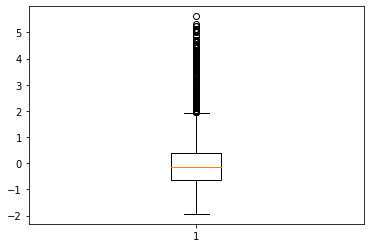

In [102]:
plt.boxplot(pov_norm)

In [106]:
census['Employed']

0       23986
1       85953
2        8597
3        8294
4       22189
        ...  
3215    13660
3216     2860
3217     6795
3218     8083
3219     8923
Name: Employed, Length: 3220, dtype: int64

In [108]:
min_max = MinMaxScaler(feature_range=(25000,50000))
min_max.fit_transform(census['Employed'].values.reshape(-1,1))

array([[25129.02869502],
       [25463.23372531],
       [25046.03159639],
       ...,
       [25036.31291605],
       [25043.25945339],
       [25047.78980382]])